<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  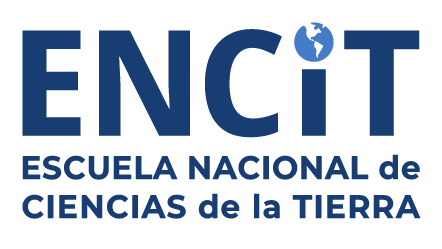
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 4: Introducción al Aprendizaje Automático (Machine Learning) </span><br/>
  <span style="color:DodgerBlue; font-size:140%;"> Preprocesamiento de datos: Análisis multivariado </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen">  Análisis multivariado </font>**

El análisis multivariado es fundamental para el machine learning porque
permite analizar la relación entre múltiples variables para encontrar patrones, hacer predicciones y clasificar datos. Se usa para entender la complejidad de datos que no se podrían captar con un análisis univariado o bivariado, aplicando técnicas como la regresión múltiple y el análisis de componentes principales (PCA) para predecir tendencias, segmentar grupos y mejorar la toma de decisiones en diversas áreas.

## **<font color="SeaGreen"> Detección de valores atípicos multivariados </font>**

La detección de valores atípicos multivariados en machine learning
identifica puntos de datos que son inusuales cuando se consideran en relación con varias variables simultáneamente. Esto es más complejo que la detección univariada, ya que un punto puede parecer normal con una sola variable, pero no al analizar la combinación de todas ellas. Los métodos de machine learning para lograrlo incluyen algoritmos como el clustering y algoritmos no supervisados como el One Class SVM, que pueden identificar patrones complejos en los datos

* **Detección basada en distancia**: Calcular la distancia entre puntos de datos. Métodos como la distancia de Mahalanobis, una extensión multivariada de las pruebas univariadas, pueden ser útiles.

*  **Clustering**: Agrupar los datos y luego identificar los puntos que no pertenecen a ningún clúster o están en clústeres muy pequeños y distantes.
  
* **Otros métodos:** Existen también técnicas que analizan la distribución de los datos o utilizan enfoques semisupervisados, que combinan el aprendizaje no supervisado con supervisión humana para mejorar la precisión


## **<font color="SeaGreen"> Pronostico estacional de sequia </font>**

A lo largo de esta unidad estaremos construyendo modelos de machine learning para hacer un pronóstico estacional de sequía para un punto en el noroeste de México (lat = 29.725, lon = -109.725).


### Paso 0:   Plantear el problema

* ¿Cuál es el fenómeno físico que quiero estudiar?
    **El comportamiento de la sequía** 
* ¿Cuál es la variable dependiente?
   El SPI (Standardized Precipitation Index) —o Índice Estandarizado de Precipitación— es un indicador estadístico usado para medir las anomalías de precipitación (lluvia) en una región y período determinados. Su objetivo principal es cuantificar las condiciones de sequía o exceso de lluvia de manera estandarizada y comparable en el tiempo y el espacio.

    **La variable dependiente sera el SPI de 3 meses (que corresponde a una sequia meteorologica)**

* ¿Es una regresión o una clasificación? 



### Paso 1:  Datos 

* Obtener información diversa (¿Necesitamos muchos datos?).

    ¿Existen datos confiables que pueda usar?
    ¿Los datos tienen variedad?

* Remover información falsa, buscar/llenar valores faltantes… 

    Si no lleno los vacíos, el molodelo los aprenderá también.

* Proponer variables “predictoras” 

* Hacer un análisis estadístico de las variables propuestas.

* Definir las variables de entrada.


> Las variables que estan relacionadas con las sequías son aquellas que afectan al ciclo hidrológico y que pueden causar un estrés hídrico. Una alteración en estas variables detonan reacciones en cadena conocidas como procesos de retroalimentación.

Las variables que se proponen (inicialmente) para hacer los modelos, y sus procedencias, son las siguientes:


|Variable                                     | Abreviacion  | Base de datos  |
|---------------------------------------------|--------------|----------------|
|Precipitación acumulada                      | pcp          | CHIRPS         |
|Radiación de onda larga saliente             | OLR          | NCEP-NCAR      |
|SSTs en la región de El Niño 3.4             | SST          | NOAA           |
|Volumen de agua en la primera capa del suelo | swvl1        | ERA-5 Land     |
|Temperatura en la superficie del suelo       | skt          | ERA-5 Land     |
|Altura geopotencial en 600mb                  | hgt          | NCEP-NCAR      |




<div class="alert alert-success">
    <b>Paso 1 : <b> La misión en esta clase es hacer el análisis multivariado, vamos a ver si existe presencia de valores atípicos multivariados, y aprenderemos a quitarlos. También estudiaremos algunos métodos de agrupamiento. 
</div>


### **<font color="SeaGreen"> Importar la base de datos </font>**

* Crea un DataFrame con los datos de `sequias_datos.csv` y muestra las primeras filas.
* Muestra cuáles son las columnas que existen en el DataFrame.
* Crea un nuevo DataFrame que sólo contenga las variables `'spi', 'sst_mean_DJF', 'pcp_DJF', 'hgt_DJF', 'olr_DJF', 'skt_DJF', 'swvl1_DJF'`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler 

In [ ]:
df = ___________________________________
df.__________________________

In [ ]:
# Antes de empezar, van a graficar la linea de tiempo del SPI (Usando un lineplot)




In [ ]:
# Primero haremos el análisis del SPI de MAM y los predictores de Diciembre-Enero-Febrero

VariablesNumAnalis = [ 'spi', 'sst_mean_DJF', 'pcp_DJF', 'hgt_DJF', 'olr_DJF', 'skt_DJF', 'swvl1_DJF']

df_DEF = df[VariablesNumAnalis]
df_DEF.head()

### **<font color="SeaGreen"> Detección de valores atípicos multivariados basado en distancia </font>**

#### **Distancia de Mahalanobis**

**Considera correlaciones**: A diferencia de la distancia euclidiana, la distancia de Mahalanobis tiene en cuenta la correlación entre las variables. Esto es crucial porque un punto puede ser atípico debido a una combinación de variables, no solo a una.

**Mide la distancia al centro de la distribución multivariada:** Calcula qué tan lejos está un punto de la media de la distribución, en el espacio de los datos, considerando la forma de la distribución.
Identifica valores atípicos: Se establece un umbral. Los puntos con una distancia de Mahalanobis por encima de este umbral se clasifican como outliers.

**Relación con la distribución chi-cuadrado:** La distribución de los valores de la distancia de Mahalanobis sigue una distribución chi-cuadrado, lo que permite calcular un umbral estadísticamente apropiado para identificar outliers. 

![mahalanobis_dis.png](mahalanobis_dis.png)


#### **LOF (Local Outlier Factor)**

**Densidad local:** LOF mide la densidad de los datos alrededor de cada punto comparando la distancia a sus vecinos más cercanos con la densidad promedio de esos vecinos.

**Densidad de accesibilidad local:** El algoritmo calcula la "densidad de accesibilidad local" de cada punto, que considera qué tan fácil es llegar a ese punto desde sus vecinos.

![LOF.png](LOF.png)

In [ ]:
## Vamos a obtener los valores atípicos multivariados.

# Primero, obtenemos una copia del DataFrame original este será nuestro respaldo
df_DEF_copy = df_DEF.copy()

# Detección de valores atípicos con LOF
# Llamamos al "modelo" de detección de valores atípicos
lof = LocalOutlierFactor()

# Obtenemos los valores atípicos, si el LOF_score = 1 es un valor normal; si es -1, es atípico.
df_DEF['LOF_Score'] = lof.fit_predict(df_DEF)

# También obtenemos las puntuaciones de anormalidad de las muestras.
df_DEF['LOF_Score_Abs'] = np.abs(lof.negative_outlier_factor_)

In [ ]:
df_DEF.head()

In [ ]:
# Detección de valores atípicos con Distancia de Mahalanobis

#Primero, obtenemos la matriz de covarianza
cov_matrix = np.cov(df_DEF[VariablesNumAnalis].values.T)
#Ahora la matriz de covarianza inversa
inv_cov_matrix = np.linalg.inv(cov_matrix)

#Obtenemos la distancia de Mahalanobis 
df_DEF['Mahalanobis'] = df_DEF[VariablesNumAnalis].apply(lambda row: mahalanobis(row, df_DEF[VariablesNumAnalis].mean(), inv_cov_matrix), axis=1)
# Se obtiene el puntaje de Mahalanobis elevando al cuadradao la distancia
df_DEF['Mahalanobis_Score'] = df_DEF['Mahalanobis']**2

# Usando la prueba chi2, utilizando la distancia de Mahalanobis, 
# obtenemos el valor p que indica la probabilidad de observar una puntuación de Mahalanobis tan extrema 
# o más extrema que la calculada, suponiendo que los datos sigan una distribución normal. 
# Un valor p muy bajo (cercano a 0) sugeriría que la observación es un valor atípico
df_DEF['p_value'] = 1 - chi2.cdf(df_DEF['Mahalanobis_Score'], df_DEF[VariablesNumAnalis].shape[1]) 
df_DEF.head()

In [ ]:
# Visualización de los resultados
plt.figure()

# LOF
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_DEF, x='spi', y='pcp_DJF', hue='LOF_Score_Abs', palette='cool', legend=True)
plt.title('LOF Outlier Scores')

# Distancia de Mahalanobis
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_DEF, x='spi', y='pcp_DJF', hue='p_value', palette='cool', legend=True)
plt.title('Mahalanobis p-value')

plt.tight_layout()
plt.show()


In [ ]:
# Ahora podemos contar el número de valores atípicos
df_DEF['LOF_Score'].value_counts()

In [ ]:
# Definición de umbrales

# Para LOF, usualmente se considera outliers aquellos con un score de -1 (usando fit_predict)
# Pero también se puede usar 'LOF_Score_Abs' con un umbral personalizado, por ejemplo, el percentil 95
umbral_lof = np.percentile(df_DEF['LOF_Score_Abs'], 95)

# Para la Distancia de Mahalanobis, usaremos p_value y un umbral común es 0.05 (5% de significancia)
umbral_p_value = 0.05

# Etiquetado de outliers basado en los umbrales
df_DEF['LOF_Outlier'] = np.where(df_DEF['LOF_Score'] < umbral_lof , 'Outlier', 'Normal')
df_DEF['Mahalanobis_Outlier'] = np.where(df_DEF['p_value'] < umbral_p_value, 'Outlier', 'Normal')

df_DEF.head()

In [ ]:
# Ahora, creamos la scatter plot matrix para ver los valores atípicos encontrados con cada método.

sns.pairplot(df_DEF[VariablesNumAnalis+['LOF_Outlier']], hue='LOF_Outlier', diag_kind='hist', plot_kws={'alpha': 0.8, 's': 50, 'edgecolor': 'k'},
                        diag_kws={ 'alpha': 0.6}, corner=True, palette = 'Set2')

In [ ]:
#Ahora ustedes obtengan el pairplot de las variables, mostrando los valores atípicos por el método de mahalanobis.



In [ ]:
## ¿Cómo crearían un nuevo Data Frame que quite los valores atípicos? 



### **<font color="blue"> Detección de valores atípicos usando métodos de clustering. </font>**

La detección de valores atípicos con métodos de clustering se basa en la idea de que los valores normales formarán grupos (clústeres) densos, mientras que los valores atípicos se quedarán fuera de estos grupos o estarán muy lejos de sus centroides. 

Detección con agrupamiento jerárquico:

Se utiliza un dendrograma para visualizar la estructura de los clústeres y detectar valores atípicos.
Los puntos que aparecen aislados en las ramas más altas del dendrograma o que no se agrupan con otros de manera significativa pueden ser valores atípicos.

Estos agrupamientos se pueden obtener considerando varias distancias:
- Distancia minima (single)
- Distancia maxima (complete)
- Distancia promedio (average)
- Distancia de Ward (ward)

In [ ]:
# Primero, estandarizamos los datos
scaler = StandardScaler()
df_DEF_scaled = scaler.fit_transform(df_DEF_copy)
df_DEF_scaled_df = pd.DataFrame(df_DEF_scaled, columns=VariablesNumAnalis)

In [ ]:
#Ahora creamos el dendograma
dendrogram = sch.dendrogram(sch.linkage(df_DEF_scaled, method = 'ward'))
plt.title('Dendrograma de Ward variables predictoras de DEF')
plt.xlabel('Años')
plt.ylabel('Distancias Euclideanas')
plt.grid(True)
plt.show()

In [ ]:
# Para identificar de mejor manera los valores atípicos, podemos usar los años como etiquetas.

anios = df['Year'].tolist()

dendrogram = sch.dendrogram(sch.linkage(df_DEF_scaled_df, method = 'ward'),labels=anios)
plt.title('Dendrograma de Ward variables predictoras de DEF')
plt.xlabel('Años')
plt.ylabel('Distancias Euclideanas')
plt.grid(True)
plt.show()

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 1 </font>**

<font color="DarkBlue"> 1. Sube los datos de calidad del aire de Querétaro (`'2025-01-JQRO_hora_L1_caire.csv'`, `'2025-02-JQRO_hora_L1_caire.csv'`, `'2025-03-JQRO_hora_L1_caire.csv'`) y concaténalos para tener sólo un DataFrame.
    
<font color="DarkBlue"> 2. Sube los datos meteorológicos (`'RUOA_jqro_2025_01.csv'`,`'RUOA_jqro_2025_02.csv'`, `'RUOA_jqro_2025_03.csv'`) y concaténalos. Cambia el nombre de `"TIMESTAMP"` por `"Time"`, y únelo con el Dataframe del punto anterior usando `.merge()`.
    
<font color="DarkBlue"> 3. Grafica la serie de tiempo de `'PM2.5'` y `'PM10'`.

<font color="DarkBlue"> 4. Agrega 2 columnas extra `'PM2.5_5horasdeps'` y `'PM10_5horasdeps'`, estas van a contener los datos desplazados de las columnas originales para relacionar los contaminantes con los datos meteorológicos de 5 horas antes (usa `.shift(-5)`).

<font color="DarkBlue"> 5. Crea un nuevo DataFrame que sólo tenga los datos cuyos valores de `'PM10_flag'` y `'PM2.5_flag'` sean `'OK'` (osea, sólo mediciones válidas). Luego elimina las variables `'O3','O3_flag','SO2', 'SO2_flag', 'NO2', 'NO2_flag', 'NO', 'NO_flag', 'CO', 'CO_flag','PM10_flag','PM2.5_flag'`.

<font color="DarkBlue"> 6. Elimina las filas con datos faltantes.

<font color="DarkBlue"> 7. Realiza el AED (resumen estadístico, histogramas, boxplots, mapas de calor (correlaciones de Pearson y Spearman) y pairplots). 

<font color="DarkBlue"> 8. Realiza el análisis multivariado: Evalúa si hay presencia de valores atípicos, verifica cuál método elimina los valores atípicos correctos, quita los valores atípicos y guarda tus datos en un archivo csv.  


---